## 0. 데이터 불러오기, 전체적인 구상 설명

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('listings_Denvor.csv')

In [3]:
df.head()

,id,name,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_is_superhost,neighbourhood_cleansed,...,extra_people,minimum_nights,maximum_nights,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,reviews_per_month
0,360,LoHi Secret garden at the Chickadee Cottage,666,Jennifer & Giovanni,7/8/2008,"Denver, Colorado, United States",within an hour,100%,t,Highland,...,$15.00,1,29,319,82,68,8/13/2018,9/20/2019,100.0,5.94
1,590,Comfortable - and a great value!,933,Jill,7/21/2008,"Denver, Colorado, United States",within an hour,100%,t,North Park Hill,...,$5.00,1,300,64,585,37,3/29/2009,9/29/2019,97.0,4.57
2,592,private,933,Jill,7/21/2008,"Denver, Colorado, United States",within an hour,100%,t,North Park Hill,...,$5.00,30,365,130,176,8,2/21/2009,9/6/2019,97.0,1.36
3,1940,Baker Studio Close to EVERYTHING,2150,Joanne,8/16/2008,"Denver, Colorado, United States",within an hour,100%,t,Baker,...,$100.00,2,120,137,41,19,1/24/2017,9/21/2019,99.0,1.26
4,2086,Garden Level Condo,2284,Katy,8/19/2008,"Denver, Colorado, United States",within an hour,100%,f,Hale,...,$25.00,180,1125,358,12,1,3/11/2018,10/21/2018,96.0,0.63


#### missing data를 삭제하고, data cleaning을 진행한 후에,
#### accommodates, bathrooms, bedrooms, beds, price, cleaning_fee, extra_people, minimum_nights, maximum_nights를 동적으로 할당 받는다고 가정을 하고(개인적으로 말씀드렸던것 처럼 일반적인 경우를 동적으로 받았다고 가정하고 진행하겠습니다),
#### 동적으로 할당 받은 것을 만족하는 것 중에서 host_is_superhost, host_response_time, host_response_rate, availability_365, number_of_reviews, review_scores_rating, reviews_per_month의 데이터를 이용하여 rank를 매기는 것을 최종 목표로 한다.
#### Airbnb는 일반인이 제공하는 숙박 업소로 위험성이 존재한다. 아래에서 더 자세히 설명하겠지만 'host_is_superhost'라는 superhost인 host를 0순위로 놓고 고객들에게 안전한 숙박 업소를 추천하는 것을 최우선의 목표로 한다. 고객들을 안전한 property를 원한다.

## 1. missing data 확인하여 없애기

In [4]:
df.shape[0]

4601

#### missing data는 삭제하는 방향으로 가려고 한다. 지금은 4601개의 행이 있는데 missing data를 삭제한 후 다시 한 번 행 개수를 세어 어느 정도의 데이터가 삭제되었는지를 알아보려한다.

In [5]:
df.isnull().sum()

id                           0
name                         0
host_id                      0
host_name                    4
host_since                   4
host_location                9
host_response_time         591
host_response_rate         591
host_is_superhost            4
neighbourhood_cleansed       0
city                         1
state                        1
zipcode                     47
market                       6
smart_location               0
country_code                 0
country                      0
latitude                     0
longitude                    0
property_type                0
room_type                    0
accommodates                 0
bathrooms                    3
bedrooms                     0
beds                         0
square_feet               4578
price                        0
cleaning_fee               392
extra_people                 0
minimum_nights               0
maximum_nights               0
availability_365             0
number_o

#### 분석에서 중요한 데이터라고 할 수 있는
#### host_response_time, host_response_rate의 missing data는 591개
#### host_is_superhost는 4개
#### bathrooms는 3개
#### cleaning_fee는 392개
#### first_review, last_review는 453개
#### review_scores_rating는 474개
#### reviews_per_month 453개의 missing data가 있다.
#### 이것들의 데이터가 없으면 분석을 하는데 어려움이 있을거라 판단하고, 예측을 할 수도 없다고 판단하여 삭제하기로 결정하였다.
#### 위에 언급한 데이터가 아니더라도 property를 추천해주는 최종 목표에서 보았을 때, 추천을 받은 후에 알아야할 정보들이므로, 또한 위에 언급한 것 이외의 데이터의 missing data는 거의 없으므로 삭제하더라도 무관하다고 판단하여 삭제하기로 결정하였다.
#### square_feet의 경우에는 missing data가 4578개이므로 열 전체를 삭제하기로 결정하였다.

In [6]:
df = df[['id', 'name', 'host_id', 'host_name', 'host_since', 'host_location', 'host_response_time', 'host_response_rate', 'host_is_superhost', 'neighbourhood_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'cleaning_fee', 'extra_people', 'minimum_nights', 'maximum_nights', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'first_review', 'last_review', 'review_scores_rating', 'reviews_per_month']].dropna()
#위의 코드에서 df[['']]안에 'square_feet'을 넣지 않으므로써 square_feet라는 열 자체를 삭제함.

In [7]:
df = df.reset_index(drop = True)

In [8]:
df.isnull().sum()

id                        0
name                      0
host_id                   0
host_name                 0
host_since                0
host_location             0
host_response_time        0
host_response_rate        0
host_is_superhost         0
neighbourhood_cleansed    0
city                      0
state                     0
zipcode                   0
market                    0
smart_location            0
country_code              0
country                   0
latitude                  0
longitude                 0
property_type             0
room_type                 0
accommodates              0
bathrooms                 0
bedrooms                  0
beds                      0
price                     0
cleaning_fee              0
extra_people              0
minimum_nights            0
maximum_nights            0
availability_365          0
number_of_reviews         0
number_of_reviews_ltm     0
first_review              0
last_review               0
review_scores_rating

#### missing data가 삭제되었는지 확인 완료

In [9]:
df.shape[0]

3482

In [10]:
(4601-3482)/4601*100

24.320799826124755

In [11]:
3482/4601*100

75.67920017387524

#### missing data 삭제 후 4601개의 행에서 3482개의 행이 남았고,
#### 약 24.3%의 데이터가 삭제 되었지만
#### 약 75.7%의 missing data가 없는 온전한 데이터가 보존되었다.
#### 결과적으로 missing data를 모두 삭제해도 75% 이상의 데이터가 남아있으므로 이대로 진행해도 된다고 판단하였다.

## 2. data cleaning (잘못된 데이터 확인해보기)

In [12]:
df['host_response_rate'] = df['host_response_rate'].str.replace('%', '')

df['price'] = df['price'].str.replace('$', '')
df['cleaning_fee'] = df['cleaning_fee'].str.replace('$', '')
df['extra_people'] = df['extra_people'].str.replace('$', '')

In [13]:
df['price'] = df['price'].str.replace(',', '') #price에는 $1,500.00이라는 큰 단위의 금액이 있어 ','까지 제거해줘야했다.df[['host_response_rate', 'price', 'cleaning_fee', 'extra_people']] = df[['host_response_rate', 'price', 'cleaning_fee', 'extra_people']].apply(pd.to_numeric)

In [14]:
df[['host_response_rate', 'price', 'cleaning_fee', 'extra_people']] = df[['host_response_rate', 'price', 'cleaning_fee', 'extra_people']].apply(pd.to_numeric)

#### df.describe를 하기 전에 중요한 데이터인 host_response_rate에는 %가 표시 되어있었고, price, cleaning_fee, extra_people이 달러 표시가 되어있어 문자열 취급이 되었는데 분석을 위해 % 표시와 달러 표시를 삭제하고 int형으로 바꿔주었다.

In [15]:
df.describe() #숫자밖에 안 보임, 문자는 따로 찾아야함

,id,host_id,host_response_rate,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,extra_people,minimum_nights,maximum_nights,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,reviews_per_month
count,3.482000e+03,3.482000e+03,3482.000000,3482.000000,3482.000000,3482.000000,3482.000000,3482.000000,3482.000000,3482.000000,3482.00000,3482.000000,3482.000000,3482.000000,3482.000000,3482.000000,3482.000000,3482.000000,3482.000000,3482.000000
mean,2.315015e+07,8.235298e+07,98.329121,80211.171166,39.741316,-104.976321,4.409822,1.459075,1.714532,2.211947,167.01436,77.091327,13.947731,5.057438,561.655945,142.740666,61.224009,28.606261,96.862723,3.282338
std,9.998237e+06,8.229631e+07,7.093516,16.718911,0.031366,0.057048,2.850895,0.881424,1.119959,1.629728,415.21232,64.109611,22.279856,12.519178,534.541562,119.111530,77.194121,27.907423,4.961570,2.566483
min,3.600000e+02,6.150000e+02,0.000000,80010.000000,39.617620,-105.109860,1.000000,0.000000,0.000000,0.000000,10.00000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,20.000000,0.020000
25%,1.624795e+07,1.590203e+07,100.000000,80205.000000,39.728655,-105.012232,2.000000,1.000000,1.000000,1.000000,75.00000,35.000000,0.000000,1.000000,28.000000,47.250000,11.000000,6.000000,96.000000,1.200000
50%,2.402601e+07,4.778579e+07,100.000000,80210.000000,39.748990,-104.982665,4.000000,1.000000,1.000000,2.000000,104.00000,60.000000,10.000000,2.000000,365.000000,109.000000,35.000000,20.000000,98.000000,2.780000
75%,3.158760e+07,1.417035e+08,100.000000,80218.000000,39.762145,-104.959457,6.000000,2.000000,2.000000,3.000000,160.75000,100.000000,20.000000,2.000000,1125.000000,249.000000,81.000000,43.000000,100.000000,4.800000
max,3.890536e+07,2.935359e+08,100.000000,80249.000000,39.813180,-104.735070,18.000000,17.000000,9.000000,14.000000,9999.00000,700.000000,300.000000,365.000000,1825.000000,365.000000,799.000000,211.000000,100.000000,18.530000


### 1. bathrooms, bedrooms의 min이 0인 것은 더 조사할 필요성 있음
### 2. price, cleaning_fee, extra_people의 max값은 더 조사할 필요성 있음
### 3. cleaning_fee, extra_people의 min값이 0인 것은 더 조사할 필요성 있음
### 4. number_of_reviews의 max 더 조사할 필요성 있음

#### id, host_id 이상 없음
#### host_response_rate 이상 없음
#### zipcode, latitude, longitude의 min값과 max값 이상 없음
#### accommodates 이상 없음
#### bathrooms max가 17개, bedrooms max가 9개인 것은 아주 넓은 방으로 예상됨 -> 이상 없음
#### minimum_nights, maximum_nights의 max는 장기 투숙인 것으로 예상됨 -> 이상 없음
#### availability_365 min값 0, max값 365 -> 이상 없음
#### review_scores_rating, reviews_per_month 이상 없음

In [16]:
df['bathrooms'].value_counts()

1.0     2315
2.0      478
1.5      224
2.5      186
3.0      112
3.5      101
4.0       30
4.5       15
5.0        7
5.5        3
0.5        2
17.0       2
7.0        2
6.5        1
6.0        1
10.5       1
8.0        1
0.0        1
Name: bathrooms, dtype: int64

In [17]:
df_bathrooms = df[df['bathrooms']==0]

print('bedrooms =', df_bathrooms.iloc[0]['bedrooms'])
print('beds =', df_bathrooms.iloc[0]['beds'])
print('price =', df_bathrooms.iloc[0]['price'])

bedrooms = 0
beds = 1
price = 67.0


In [18]:
df = df[df.bathrooms != 0]

df = df.reset_index(drop = True)

In [19]:
df['bathrooms'].value_counts()

1.0     2315
2.0      478
1.5      224
2.5      186
3.0      112
3.5      101
4.0       30
4.5       15
5.0        7
5.5        3
0.5        2
17.0       2
7.0        2
8.0        1
6.0        1
10.5       1
6.5        1
Name: bathrooms, dtype: int64

In [20]:
df.shape[0]

3481

#### 0.5개인 것은 소변기, 좌변기만 있는 것을 의미한다고 한다.
#### bathrooms에서 0개인 값을 가지는 데이터는 딱 1개이다. 조사를 더 해보니 bathroom이 0개임과 동시에 bedroom도 0개이고, 침대는 1개이다. 그런데 price는 67달러이다. price의 min값이 10달러인데 bathroom과 bedroom이 0개인 곳이 67달러가 된다는 것은 납득하기는 어렵다.
#### 그래서 bathrooms이 0인 값을 잘못된 값이라고 판단하였고 bathrooms이 0인 값의 행을 삭제하였다.
#### 삭제 후 다시 한 번 df['bathrooms'].value_counts()를 해보니 0이 삭제된 것을 확인할 수 있었고, df.shape[0]으로 행 개수를 확인해보니 3482개 에서 3481개 정확히 bathrooms이 0개인 행 딱 1개가 삭제되었다는 것을 확인하였다.

In [21]:
df['bedrooms'].value_counts()

1    1717
2     944
3     401
0     164
4     158
5      69
6      19
8       6
7       2
9       1
Name: bedrooms, dtype: int64

#### bedrooms이 0개인 값은 164개로 생각보다 많았다. bedroom은 제공되지 않고 거실만 제공되는 경우라고 생각하여 이상 없음이라고 판단하였다.

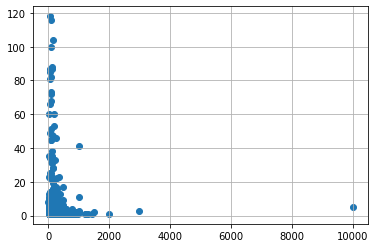

In [22]:
price = df['price'].value_counts()

plt.grid()
plt.scatter(x=price.index, y=price.values)

plt.show()

#### 가로축은 price값, 세로축은 각 price값에 해당하는 수이다.
#### 대체적으로 평균값인 167달러에 쏠려있고, 의심되었던 price의 max값을 위의 그래프로 조사해본 결과 10000달러에 가까운 금액은 딱 1개의 행만 그런 것도 아니고, 장기투숙과 아파트를 통채로 빌린 경우인 것으로 생각되어 이상 없음으로 판단하였다.

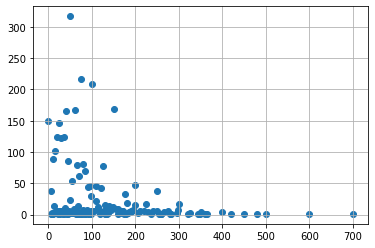

In [23]:
cleaning_fee = df['cleaning_fee'].value_counts()

plt.grid()
plt.scatter(x=cleaning_fee.index, y=cleaning_fee.values)

plt.show()

#### 가로축은 cleaning_fee값, 세로축은 각 cleaning_fee값에 해당하는 수이다.
#### cleaning_fee에서는 max값과 min값이 0인 것을 더 조사하는 것을 목표로 했다.
#### 500달러를 넘어가는 max값은 그래프상으로 아주 작은 숫자들이 구성되어있어 거의 바닥을 깔고 있다. 아주 좋은 집의 장기투숙일 것으로 예상되어 이상 없음으로 판단하였다.
#### cleaning_fee에서 값이 0인 것은 150개 정도였다. 생각보다 많은 수치였고, 서비스 차원에서 무료로 해주는 것이라고 생각하여 이상 없음으로 판단하였다.

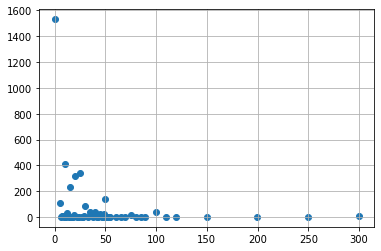

In [24]:
extra_people = df['extra_people'].value_counts()

plt.grid()
plt.scatter(x=extra_people.index, y=extra_people.values)

plt.show()

#### 가로축은 extra_people값, 세로축은 각 extra_people값에 해당하는 수이다
#### extra_people에서는 max값과 min값이 0인 것을 더 조사하는 것을 목표로 했다.
#### 150달러를 넘어가는 max값의 경우 그래프상으로도 아주 낮게 깔려 있고, 좋은 집의 경우, 장기 투숙일 경우 이럴 수도 있다고 생각되어 이상 없음으로 판단하였다.
#### 0달러의 경우를 의심했었는데 압도적으로 많은 수치인 1500개를 넘어가고 있다. 3481개의 데이터에서 1500개가 넘어가는 데이터를 잘못된 데이터라고 판단하여 삭제하기도 힘들고, 경쟁에서 살아남기 위한 목적으로 추가 금액을 받지 않는다고 생각되어 이상 없음으로 판단하였다.

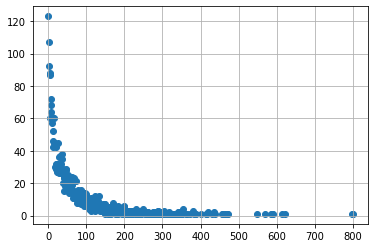

In [25]:
number_of_reviews = df['number_of_reviews'].value_counts()

plt.grid()
plt.scatter(x=number_of_reviews.index, y=number_of_reviews.values)

plt.show()

In [26]:
df_number_of_reviews = df[df['number_of_reviews']==799] #max값이 799라는 것은 df.describe()을 통해서 알았다.

print('host_since =', df_number_of_reviews.iloc[0]['host_since'])

host_since = 5/19/2012


#### number_of_reviews에서 max값을 의심했었는데, 2012년부터 7년동안(꽤 오랫동안, 리뷰 수가 799개일 정도의 기간동안) 운영하고 있고, 인기가 매우 많은 것이었다고 생각되어 이상 없음으로 판단하였다.

In [27]:
print(df['name'].value_counts().to_string())

Comfy beds in City Center! Park n' walk everywhere                                                                                                                                                                                                             10
Urban Apartment in Downtown Denver                                                                                                                                                                                                                              3
Cheesman Park Getaway                                                                                                                                                                                                                                           2
Large Downtown Home Walking Distance Sleeps 10!                                                                                                                                                                                   

#### 대충 봐도 '??????'가 붙어있거나 '??The Lily-Pad??' 이런게 붙어있거나 오류가 있는 부분이 많았다. 이것을 하나씩 수정하기는 힘들고 name에 따른 id가 부여되어 있어서 name을 몰라도 id로 찾을 수 있으니 어쩔 수 없이 수정하지 않더라도 나중에 문제가 되는 부분은 없을거라 판단하여 그대로 두기로 결정하였다. 

In [28]:
print(df['host_name'].value_counts().to_string())

Loftium                                85
Michael                                45
David                                  36
Stay Alfred                            32
Evolve                                 30
John                                   29
Sarah                                  29
Chris                                  23
Brian                                  23
Ryan                                   22
Paul                                   20
James                                  19
Greg                                   19
Scott                                  19
Sonder (Denver)                        19
Jason                                  19
Mark                                   19
Jennifer                               18
Alex                                   17
Josh                                   17
Matt                                   17
Stephen                                16
Tim                                    15
Christopher                       

In [29]:
df['host_name'] = df['host_name'].str.replace('+', '&')

In [30]:
print(df['host_name'].value_counts().to_string())

Loftium                                85
Michael                                45
David                                  36
Stay Alfred                            32
Evolve                                 30
Sarah                                  29
John                                   29
Brian                                  23
Chris                                  23
Ryan                                   22
Paul                                   20
Mark                                   19
Sonder (Denver)                        19
Greg                                   19
James                                  19
Scott                                  19
Jason                                  19
Jennifer                               18
Alex                                   17
Josh                                   17
Matt                                   17
Stephen                                16
Tim                                    15
Daniel                            

#### hostname에서 공동으로 운영하는 경우 '&' 또는 '+'를 붙여주는 것을 확인했는데 통일성을 위하여 '+'를 '&'로 바꿔주어 '&'로 통일하였다. 그 후에 제대로 고쳐졌는지 한 번 더 확인한 결과 제대로 고쳐진 것을 확인하였다.

In [31]:
print(df['host_since'].value_counts().to_string())

12/4/2018     86
10/8/2018     28
9/20/2017     26
1/22/2016     19
2/4/2013      19
11/25/2014    17
2/1/2017      17
12/26/2014    16
10/12/2018    14
5/5/2016      13
5/14/2019     11
7/29/2015     11
6/18/2018     10
6/3/2015      10
4/29/2019     10
11/12/2015    10
5/8/2014       9
12/19/2014     9
6/21/2015      9
1/17/2015      9
8/15/2016      9
4/8/2019       9
7/11/2019      9
6/28/2016      9
4/11/2014      9
4/7/2013       8
12/17/2012     8
11/17/2015     8
3/2/2015       7
3/12/2015      7
5/26/2015      7
8/27/2015      7
1/26/2015      7
9/6/2017       7
3/20/2017      7
3/1/2019       7
7/29/2014      7
8/29/2014      7
9/5/2013       7
7/1/2017       7
12/9/2012      7
6/22/2015      6
6/6/2016       6
11/13/2015     6
5/27/2015      6
5/22/2016      6
7/27/2011      6
10/21/2015     6
11/10/2017     6
8/25/2014      6
12/4/2014      6
7/10/2017      6
9/8/2014       6
4/9/2012       6
5/18/2017      6
11/7/2012      6
7/28/2018      6
8/22/2012      6
8/8/2017      

#### 이상 없음

In [32]:
print(df['host_location'].value_counts().to_string())

Denver, Colorado, United States                    2767
US                                                  243
Seattle, Washington, United States                   88
United States                                        55
Spokane, Washington, United States                   32
Boulder, Colorado, United States                     24
New York, New York, United States                    18
Los Angeles, California, United States               17
Aurora, Colorado, United States                      15
Littleton, Colorado, United States                   14
Englewood, Colorado, United States                    9
Lakewood, Colorado, United States                     8
Colorado, United States                               8
North Shore of Massachusetts, United States           7
Las Vegas, Nevada, United States                      7
Chicago, Illinois, United States                      7
Nashville, Tennessee, United States                   7
Austin, Texas, United States                    

In [33]:
df['host_location'] = df['host_location'].str.replace('US', 'United States')

In [34]:
df['host_location'].value_counts()

Denver, Colorado, United States                2767
United States                                   298
Seattle, Washington, United States               88
Spokane, Washington, United States               32
Boulder, Colorado, United States                 24
                                               ... 
Saint Clair Shores, Michigan, United States       1
Indianapolis, Indiana, United States              1
Santa Monica, California, United States           1
Charlotte, North Carolina, United States          1
Watsonville, California, United States            1
Name: host_location, Length: 112, dtype: int64

#### host_location에서 'US'가 243개, 'United States'가 55개가 있다. 'United States'의 약자가 'US'인데 데이터 통일이 안 되어있다.
#### 다른 데이터들에서는 예를 들어 'Denver, Colorado, United States'처럼 약자가 아닌 풀네임을 쓰므로 'US'를 전부 'United States'로 바꾸기로 결정하였고,
#### 바꾼 후에 다시 한 번 확인해보니 'United States'가 298(243+55)개가 정확히 들어가 있었다.

In [35]:
df['host_response_time'].value_counts()

within an hour        3004
within a few hours     334
within a day           131
a few days or more      12
Name: host_response_time, dtype: int64

#### 이상 없음

In [36]:
df['host_is_superhost'].value_counts()

t    2035
f    1446
Name: host_is_superhost, dtype: int64

#### 이상 없음

In [37]:
print(df['neighbourhood_cleansed'].value_counts().to_string())

Five Points                     288
Highland                        224
Sunnyside                       127
Capitol Hill                    126
Speer                           113
Union Station                   111
Whittier                        109
West Highland                   107
City Park West                  106
Berkeley                        106
West Colfax                     105
Gateway - Green Valley Ranch    104
Baker                            96
Lincoln Park                     90
Sloan Lake                       89
Congress Park                    84
Cole                             68
Jefferson Park                   66
Platt Park                       65
Stapleton                        61
North Park Hill                  60
North Capitol Hill               57
Cheesman Park                    57
Clayton                          55
Washington Park West             46
Skyland                          46
CBD                              46
Regis                       

#### 이상 없음

In [38]:
df['city'].value_counts()

Denver               3444
Aurora                  9
Englewood               9
Wheat Ridge             8
Lakewood                6
Littleton               3
Stapleton, Denver       1
Denver                  1
Name: city, dtype: int64

#### Denver이 맨 위의 값에 3444개가 있는데, 맨 아래에 1개의 값이 있다. 똑같은 Denver인데 왜 3444개와 1로 나누어지는지는 모르겠다. 어찌되었든간에 Denver가 쪼개졌다고해서 분석에 지장이 있는 것도 아니고, 추천 시스템에 띄워질 때는 똑같이 Denver로 출력될 것이니 상관이 없다고 판단하여 그대로 두기로 했다.
#### 라고 생각하였지만 Denver 뒤에 한 칸을 뛰어써서 그랬다는 것을 알게되었다.(아래에서 나올 'smart_location'에서 이 사실을 알게되었다)

In [39]:
df['city'] = df['city'].str.replace('Denver ', 'Denver')

In [40]:
df['city'].value_counts()

Denver               3445
Aurora                  9
Englewood               9
Wheat Ridge             8
Lakewood                6
Littleton               3
Stapleton, Denver       1
Name: city, dtype: int64

#### 한 칸 뛰어쓰기 된 부분을 찾아서 올바르게 고쳐주었다.
#### df['city'].value_counts()로 확인해보니 Denverdl 3445(3444+1)로 확인 되었다.

In [41]:
df['state'].value_counts()

CO    3481
Name: state, dtype: int64

#### 이상 없음

In [42]:
df['market'].value_counts()

Denver    3480
Austin       1
Name: market, dtype: int64

#### Austin이 1개이긴 하지만, Denver을 Austin으로 잘못 기록한 것이라고는 생각되지 않을만큼 스펠링이 너무 다르고 실제로 Austin이라는 도시가 있다. 따라서 이상 없음으로 판단하였다.

In [43]:
df['smart_location'].value_counts()

Denver, CO               3444
Aurora, CO                  9
Englewood, CO               9
Wheat Ridge, CO             8
Lakewood, CO                6
Littleton, CO               3
Denver , CO                 1
Stapleton, Denver, CO       1
Name: smart_location, dtype: int64

#### 맨 위에 'Denver, CO'과 맨 아래에 'Denver, CO'은 같은 값인데 뛰어쓰기가 한 칸이 되어있어 다른 값으로 count가 되었다.(여기서 city에서 Denver이 왜 2개로 나뉘었는지 이유를 알게 되었다.)

In [44]:
df['smart_location'] = df['smart_location'].str.replace('Denver , CO', 'Denver, CO')

In [45]:
df['smart_location'].value_counts()

Denver, CO               3445
Aurora, CO                  9
Englewood, CO               9
Wheat Ridge, CO             8
Lakewood, CO                6
Littleton, CO               3
Stapleton, Denver, CO       1
Name: smart_location, dtype: int64

#### 뛰어쓰기 된 것을 바르게 고쳐주고 확인해보니 'Denver, CO'가 3445(3444+1)이 된 것을 확인할 수 있었다.

In [46]:
df['country_code'].value_counts()

US    3481
Name: country_code, dtype: int64

#### 이상 없음

In [47]:
df['country'].value_counts()

United States    3481
Name: country, dtype: int64

#### 이상 없음

In [48]:
df['property_type'].value_counts()

House                 1365
Apartment              536
Townhouse              440
Guest suite            380
Condominium            273
Bungalow               159
Guesthouse             158
Loft                    84
Bed and breakfast       23
Hostel                  15
Cottage                 13
Camper/RV                8
Other                    6
Aparthotel               6
Serviced apartment       6
Tiny house               4
Villa                    3
Castle                   2
Name: property_type, dtype: int64

#### 'Other'이라는 부분이 걸리지만 하나씩 찾아서 바꿔줄 수도 없고, 어차피 추천 시스템에서 원하는 property_type을 입력 받을 때(동적으로 받는다고 가정하고 진행한다고 앞에서 언급함) 걸러지는 것이니 삭제할 필요까지는 없다고 판단하였다.

In [49]:
df['room_type'].value_counts()

Entire home/apt    2627
Private room        780
Shared room          43
Hotel room           31
Name: room_type, dtype: int64

#### 이상 없음

In [50]:
print(df['first_review'].value_counts().to_string())

9/2/2019      22
9/15/2019     21
4/21/2019     17
7/7/2019      14
1/1/2019      14
5/27/2019     13
6/9/2019      13
9/23/2018     13
8/4/2019      12
5/5/2019      11
8/11/2019     11
5/29/2017     11
4/7/2019      11
8/5/2018      11
6/12/2019     11
4/12/2019     11
6/16/2019     10
7/19/2019     10
5/26/2019     10
4/22/2019     10
9/5/2016      10
9/4/2017      10
1/1/2018       9
12/30/2018     9
11/11/2018     9
8/6/2018       9
9/8/2019       9
5/13/2018      9
5/19/2019      9
6/30/2019      9
10/14/2018     9
8/25/2019      9
4/20/2019      9
4/14/2019      9
7/6/2019       9
12/16/2018     9
5/6/2018       9
1/13/2019      9
3/3/2019       8
3/10/2019      8
3/26/2018      8
7/15/2018      8
9/16/2018      8
6/2/2019       8
8/16/2019      8
8/12/2018      8
1/1/2017       8
1/2/2017       8
7/14/2019      8
4/22/2018      8
12/2/2018      8
8/27/2018      8
3/31/2019      8
7/25/2019      8
9/1/2019       8
8/23/2019      8
5/13/2019      7
6/18/2018      7
7/1/2018      

#### 이상 없음

In [51]:
print(df['last_review'].value_counts().to_string())

9/22/2019     246
9/23/2019     208
9/15/2019     199
9/16/2019     163
9/26/2019     151
9/24/2019     150
9/28/2019     150
9/25/2019     144
9/29/2019     142
9/27/2019     131
9/2/2019      128
9/14/2019     111
9/21/2019      80
9/17/2019      70
9/13/2019      69
9/20/2019      60
9/1/2019       58
9/8/2019       58
9/12/2019      49
9/18/2019      46
9/9/2019       45
9/19/2019      36
9/10/2019      29
9/3/2019       28
8/4/2019       24
9/11/2019      23
8/11/2019      23
8/18/2019      21
8/31/2019      21
9/7/2019       20
8/25/2019      19
9/4/2019       19
8/26/2019      18
8/19/2019      17
8/30/2019      15
8/10/2019      15
7/21/2019      15
7/28/2019      14
8/12/2019      14
8/24/2019      13
7/7/2019       13
9/6/2019       13
8/17/2019      12
8/3/2019       12
7/31/2019      11
8/16/2019      11
8/1/2019       11
8/5/2019       10
8/23/2019      10
8/15/2019      10
8/29/2019      10
8/28/2019      10
8/20/2019      10
9/5/2019        9
7/22/2019       9
6/16/2019 

#### 이상 없음

## 3. 몇가지 흥미로운 findings 설명하기

### 3-(1). 여러개의 property를 갖고 있는 개인을 찾기(독점하는 사람이 있는지) - (교수님이 주신 예시)

In [52]:
df['host_id'].value_counts()

229095817    85
151394248    24
219524979    19
4962900      18
25229782     14
             ..
45172079      1
87038528      1
7961148       1
48448059      1
271862184     1
Name: host_id, Length: 2583, dtype: int64

In [53]:
df_host_id = df[df['host_id']==229095817]

print('host_name =', df_host_id.iloc[0]['host_name'])

host_name = Loftium


In [54]:
df['host_name'].value_counts()

Loftium           85
Michael           45
David             36
Stay Alfred       32
Evolve            30
                  ..
Sharon             1
Margo              1
Lan And Chris      1
Alejandro          1
Liz And Austin     1
Name: host_name, Length: 1335, dtype: int64

#### 동명이인이 있을 수 있으니 host_id로 접근하였다.
#### Loftium이라는 사람이 85개의 property를 가지고 있으므로써 압도적으로 독점을 하는 사람이라는 것을 알 수 있다.
#### 더 나아가서 갑자기 독점하고 있는 사람과 이름이 같은 동명이인이 있을까?라는 궁금증이 생겼다. host_name으로 value_counts를 해보니 Loftium이 host_id와 똑같이 85개로 독점자의 동명이인은 없었다.

### 3-(2). 가장 비싼, 저렴한 property 찾기 - (교수님이 주신 예시)

In [55]:
df.describe()

,id,host_id,host_response_rate,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,extra_people,minimum_nights,maximum_nights,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,reviews_per_month
count,3.481000e+03,3.481000e+03,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000
mean,2.314601e+07,8.235274e+07,98.328641,80211.167768,39.741323,-104.976317,4.410514,1.459494,1.715024,2.212295,167.043091,77.112037,13.950302,5.058604,561.815283,142.734272,61.239874,28.612755,96.861821,3.282180
std,9.996686e+06,8.230814e+07,7.094478,16.720110,0.031367,0.057056,2.851012,0.881204,1.119742,1.629833,415.268511,64.107171,22.282540,12.520788,534.535649,119.128045,77.199534,27.908801,4.961997,2.566835
min,3.600000e+02,6.150000e+02,0.000000,80010.000000,39.617620,-105.109860,1.000000,0.500000,0.000000,0.000000,10.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,20.000000,0.020000
25%,1.624448e+07,1.589901e+07,100.000000,80205.000000,39.728670,-105.012240,2.000000,1.000000,1.000000,1.000000,75.000000,35.000000,0.000000,1.000000,28.000000,47.000000,11.000000,6.000000,96.000000,1.200000
50%,2.401764e+07,4.773906e+07,100.000000,80210.000000,39.749000,-104.982660,4.000000,1.000000,1.000000,2.000000,104.000000,60.000000,10.000000,2.000000,365.000000,109.000000,35.000000,20.000000,98.000000,2.780000
75%,3.158660e+07,1.418714e+08,100.000000,80218.000000,39.762150,-104.959340,6.000000,2.000000,2.000000,3.000000,161.000000,100.000000,20.000000,2.000000,1125.000000,249.000000,81.000000,43.000000,100.000000,4.800000
max,3.890536e+07,2.935359e+08,100.000000,80249.000000,39.813180,-104.735070,18.000000,17.000000,9.000000,14.000000,9999.000000,700.000000,300.000000,365.000000,1825.000000,365.000000,799.000000,211.000000,100.000000,18.530000


#### 가장 비싼 property는 9999달러, 매우 비싼 아파트 같은 것을 통채로 빌린 것으로 예상된다.
#### 가장 저렴한 property는 10달러이다.

### 3-(3) superhost는 어떻게 되는가? 추적해보기

In [56]:
df_superhost = df.loc[df['host_is_superhost']=='t']

df_superhost = df_superhost[['host_since', 'host_response_time', 'host_response_rate', 'number_of_reviews', 'review_scores_rating', 'reviews_per_month']]

df_superhost.describe()

,host_response_rate,number_of_reviews,review_scores_rating,reviews_per_month
count,2035.000000,2035.000000,2035.000000,2035.00000
mean,99.055037,82.391646,97.904177,3.70829
std,4.733499,84.894732,2.826020,2.53854
min,0.000000,1.000000,20.000000,0.02000
25%,100.000000,27.000000,97.000000,1.70000
50%,100.000000,56.000000,98.000000,3.35000
75%,100.000000,108.000000,99.000000,5.25000
max,100.000000,799.000000,100.000000,17.91000


In [57]:
df_no_superhost = df.loc[df['host_is_superhost']=='f']

df_no_superhost = df_no_superhost[['host_since', 'host_response_time', 'host_response_rate', 'number_of_reviews', 'review_scores_rating', 'reviews_per_month']]

df_no_superhost.describe()

,host_response_rate,number_of_reviews,review_scores_rating,reviews_per_month
count,1446.000000,1446.000000,1446.000000,1446.000000
mean,97.306362,31.472337,95.394882,2.682503
std,9.374754,51.877927,6.661126,2.486156
min,0.000000,1.000000,20.000000,0.020000
25%,100.000000,5.000000,93.000000,0.770000
50%,100.000000,14.000000,97.000000,2.000000
75%,100.000000,37.000000,100.000000,4.000000
max,100.000000,798.000000,100.000000,18.530000


#### superhost는 어떻게 되는지를 추적하려고 superhost인 사람과 아닌 사람을 구분하여 host를 판단할 수 있는 columns들로만 describe를 해보았더니 평균값에서 가장 확실하게 차이가 나는 것은 number_of_reviews였다.
#### superhost인 host는 리뷰 수가 평균 약 82개, superhost가 아닌 host는 리뷰 수가 약 31개로 많은 차이를 보였다. 그렇지만 superhost의 최소 리뷰 수는 1개로 superhost를 정하는 절대적인 기준은 아닌 것 같다.

## 4. 숙박할 곳을 찾고 있는 고객에게 좋은 property 추천해기

#### *host_is_superhost*, host_response_time, host_response_rate, property_type, room_type, accommmodates, bathrooms, bedrooms, beds, price, cleaning_fee, extra_people, minimum_night, maximum_night, availability_365, number_of_reviews, review_scores_rating, reviews_per_month를 활용하여 추천 시스템을 만들어보겠다.
#### host_since에서 최근에 시작한 업소를 우선순위로 할지, 오랫동안 운영한 업소를 우선순위로 할지 고민을 많이했다. 최근에 시작한 업소는 시설면에서는 좋은 것이고, 오랫동안 운영한 업소는 그만큼 잘해왔다는 점에서 위험성이 줄어든다. 고객의 안전을 최우선으로 생각하기 때문에 나는 오랫동안 운영한 업소를 우선순위로 두고 싶었는데 날짜를 조작하는 것이 매우 힘들어 추천 화면에 host_since를 띄워주어 고객에게 보여주는 방법을 선택하였다.
#### Airbnb라는 일반인이 제공하는 공유 숙박 업소의 위험성을 해결해주는 superhost를 최우선으로 두고 한다.
#### 각 columns 별로 우선순위를 정해 rank 추천 시스템을 만든다.
#### Denver가 있는 콜로라도는 스키, 록키산맥, 자연경관 등으로 유명하다. 관광하는 사람들이 많을 것이라고 생각하여 관광객을 주고객층으로 하고 시작하겠다.

In [58]:
property_type = 'House' #property_type은 House를
room_tpye = 'Entire home/apt' #room_type은 Entire home/apt를
accommodates = 6 #6명에서(extra people은 없다)
bathrooms = 1 #화장실 1개에
bedrooms = 2 #침실 2개에
beds = 3 #침대 3개에
price_max = 300 #숙박 비용이 200달러를 넘지 않고
cleaning_fee_max = 70 #청소 비용이 70달러를 넘지 않고
night = 3 #3일동안 지낼 수 있는 property를 원하는 고객이 동적으로 입력을 받았다고 가정하고 시작한다.

In [59]:
df_recommend = df.loc[(df['property_type']==property_type) & (df['room_type']==room_tpye) & (df['accommodates']==accommodates) & (df['bathrooms']==bathrooms) & (df['bedrooms']==bedrooms) & (df['beds']==beds) & (df['price']<=price_max) & (df['cleaning_fee']<=cleaning_fee_max) & (df['minimum_nights']<=night) & (df['maximum_nights']>=night)]

In [60]:
df_recommend = df_recommend.loc[(df_recommend['host_is_superhost']=='t')]

### Airbnb는 hotels.com과는 다른 성격을 띤다. Airbnb는 일반인이 제공하는 숙박 업소라는 점인데 사실 이게 굉장히 위험할 수도 있다. 모르는 사람의 집에서 숙박하는 것이기 때문에 꺼림찍하기도 하고 위험성도 따른다. 고객들에게 이러한 점을 깔끔하게 해결해주어야하는데 그게 바로 columns에 있는 'host_is_superhost'이다. Airbnb의 알고리즘에 따라 믿음직한 host에게 주어지는 것이 superhost이다. 그래서 나는 고객들에게 추천할 때 superhost인 데이터 중에서(superhost가 아니라면 추천창에 띄우지 않는다) 여러가지 우선순위들을 고려해서 추천해주겠다. 고객들은 안전을 최우선으로 생각한다.

In [61]:
df_recommend = df_recommend.reset_index(drop = True)

In [62]:
df['host_response_time'] = df['host_response_time'].str.replace('within an hour', '3')
df['host_response_time'] = df['host_response_time'].str.replace('within a few hours', '2')
df['host_response_time'] = df['host_response_time'].str.replace('within a day', '1')
df['host_response_time'] = df['host_response_time'].str.replace('a few days or more', '0')

df[['host_response_time']] = df[['host_response_time']].apply(pd.to_numeric)

#### within an hour->within a few hours->within a day->a few days or more순으로 3, 2, 1, 0의 값이 지정된다. 숫자가 크면 그만큼 빨리 답장을 해준다는 것으로 해석이 쉽게 가능해지고, 이렇게 하면 정렬할 때 편리해지므로 이렇게 하겠다.

In [63]:
df_recommend = df_recommend.sort_values(by = ['review_scores_rating', 'host_response_time', 'host_response_rate', 'reviews_per_month', 'number_of_reviews'], ascending = False)

df_recommend = df_recommend[df_recommend.availability_365 != 0]

df_recommend = df_recommend.reset_index(drop = True)

#### 우선순위는 Airbnb라는 개인이 운영하는 숙박 업소라는 위험성 부분에서(superhost로 걸러졌지만) 리뷰 점수가 가장 중요하다고 생각하여 1순위로 review_scores_rating
#### 2순위로는 응답 시간이 중요하다고 생각하여 host_response_time
#### 3순위로는 응답 시간 다음으로 중요한, 결론적으로 응답을 한 비율을 알 수 있는 host_response_rate
#### 4순위로는 host가 마음을 다잡고(?) 최근부터 좋게 바뀌어서(?) 최근 1달동안의 리뷰 개수가 많으면 4순위의 자격을 얻을 수 있다는 판단으로(물론 리뷰의 개수가 많기만 하면 안 된다는 것은 알고 있지만 1순위에 review_scores_rating을 지정했기 때문에) reviews_per_month
#### 5순위로는 총 리뷰의 개수로 우선순위를 정하고 고객에게 추천하도록 하였다.
#### first_review와 last_review도 고민해보았으나 날짜 데이터를 만지는 것이 매우 힘들어 어쩔 수 없이 추천 화면에 띄워 고객에게 보이게끔하여 고객이 판단하도록 하였다.
#### 마지막으로 availability_365는 숫자가 클수록 여유가 있다는 것인데 0이면 남아있는 property가 없으니 0인 경우는 제외하고 추천 창을 띄워주었다.

In [64]:
df_recommend = df_recommend[['id', 'name', 'host_id', 'host_name', 'host_since', 'host_location', 'neighbourhood_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country', 'latitude', 'longitude', 'availability_365', 'first_review', 'last_review']]

In [65]:
df_recommend
#superhost이고, 우선순위가 고려된 추천 property. 맨 위에서부터 1순위, 2순위...로 시작한다.

,id,name,host_id,host_name,host_since,host_location,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country,latitude,longitude,availability_365,first_review,last_review
0,21139434,Capitol Hill Gem near Downtown Denver,152508204,Michael,9/28/2017,"Denver, Colorado, United States",Cheesman Park,Denver,CO,80206.0,Denver,"Denver, CO",United States,39.73796,-104.96131,144,1/2/2018,9/25/2019
1,2119667,Reclaimed Retreat With a Glamping Tent in the ...,10535707,Nicole,12/9/2013,"Denver, Colorado, United States",Lincoln Park,Denver,CO,80204.0,Denver,"Denver, CO",United States,39.73410,-105.00069,316,1/21/2014,9/28/2019
2,20198585,Renovated Home near Downtown Denver,25663208,Julio,1/5/2015,"Denver, Colorado, United States",Clayton,Denver,CO,80205.0,Denver,"Denver, CO",United States,39.76973,-104.94417,72,3/11/2019,9/29/2019
3,26476974,A Denver Home As Fresh as the Colorado Air,106458559,Cameron,12/7/2016,"Denver, Colorado, United States",Ruby Hill,Denver,CO,80219.0,Denver,"Denver, CO",United States,39.68339,-105.02152,140,7/15/2018,9/29/2019
4,11240044,House Downtown Denver ??The Lily-Pad??,42241906,Greg,8/22/2015,"Eugene, Oregon, United States",Elyria Swansea,Denver,CO,80216.0,Denver,"Denver, CO",United States,39.77854,-104.94893,82,5/29/2017,9/15/2019
5,11713844,Franklin Oasis- Uptown Victorian Sleeps 6!,62275890,Denver Getaway,3/9/2016,"Denver, Colorado, United States",City Park West,Denver,CO,80218.0,Denver,"Denver, CO",United States,39.74276,-104.96717,68,4/17/2016,9/23/2019


#### 이것이 최종적인 고객이 요구하는 조건에 맞는, superhost이면서 내가 정한 우선순위에 따른 property의 rank이고, availability_365를 고객에게 확인 시켜줌으로써 이 property가 얼마나 여유 있는 숙박 업소인지를 알려준다.